#### Import the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

#### Read the data as a dataframe

In [2]:
df = pd.read_csv("insurance.csv")

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


this data seems to be numeric and some where categoric.

#### Shape of the data

In [4]:
# df.shape give us no. of rows and no. of columns in dataframe
df.shape

(1338, 7)

#### Data type of each attribute

In [5]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

#### Checking the presence of missing values

In [6]:
#isnull() is use to find null values in dataframe
df.isnull()

,age,sex,bmi,children,smoker,region,charges
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1333,False,False,False,False,False,False,False
1334,False,False,False,False,False,False,False
1335,False,False,False,False,False,False,False
1336,False,False,False,False,False,False,False


There is not any null value in any column

#### 5 point summary of numerical attributes 

In [7]:
# mean =  sum of all terms/number of terms
# std  =  √(∑x−x̄)2 /n) 
# min  =  minimum value of a column
# maximum  =  maximum value of a column
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Maximum age of any pateint is 64 and minimum is 18

Maximum bmi can be 53 and minimum can be 6

Maximum no of children is 5 and minimum is 0

Maximum charges is 637770 and minimum is 1121

#### Distribution of ‘bmi’, ‘age’ and ‘charges’ columns.

<Axes: xlabel='age', ylabel='Density'>

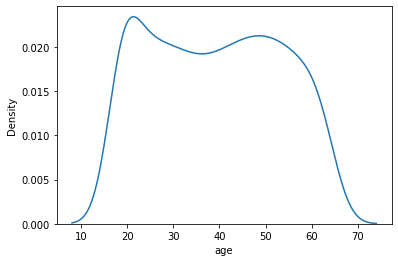

In [8]:
sns.distplot(df['age'],hist=False)
# age 20 - 30 contain higher density in data   

<Axes: xlabel='bmi', ylabel='Density'>

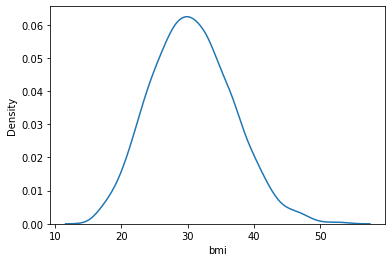

In [9]:
sns.distplot(df['bmi'],hist=False)
# bmi value 30 contain higher density in data     

<Axes: xlabel='charges', ylabel='Density'>

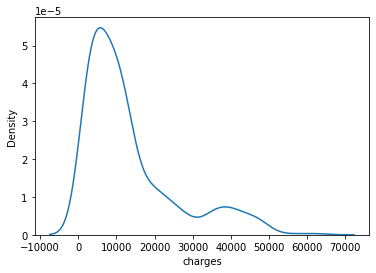

In [10]:
sns.distplot(df['charges'],hist=False)
# charges = 10000 is highest in the data

#### Measure of skewness of ‘bmi’, ‘age’ and ‘charges’ columns 

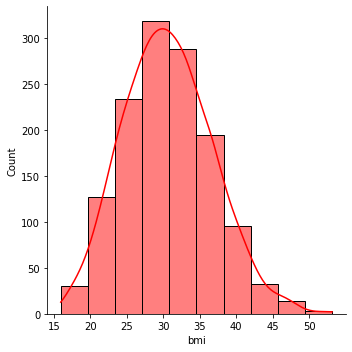

In [11]:
sns.displot(df["bmi"],kde=True,bins=10,color='r')
# mean=median=mode

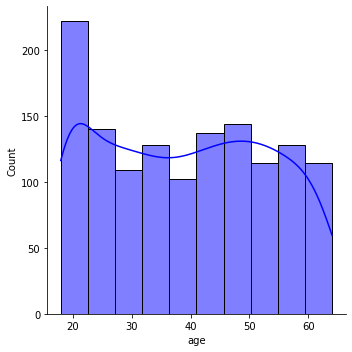

In [12]:
sns.displot(df["age"],kde=True,bins=10,color='b')
# mean=median=mode

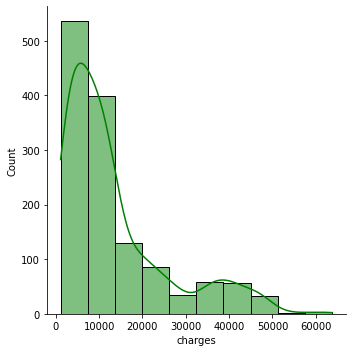

In [13]:
sns.displot(df["charges"],kde=True,bins=10,color='g')
# mode<median<mean

In [14]:
#skew values of different columns in dataframe
df.skew(axis=0)

age         0.055673
bmi         0.284047
children    0.938380
charges     1.515880
dtype: float64

A skewness value of charges which is greater than 1 indicates a highly skewed distribution. 

A value of children which is between 0.5 and 1 is moderately skewed. 

A value of age and bmi which is between -0.5 and 0.5 indicates that the distribution is fairly symmetrical.

#### Checking the presence of outliers in ‘bmi’, ‘age’ and ‘charges'  columns 

<Axes: xlabel='bmi'>

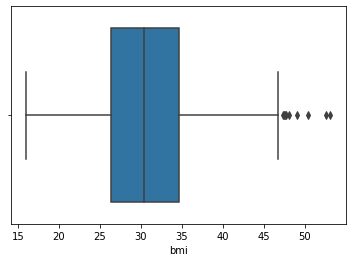

In [15]:
sns.boxplot(x=df['bmi'])

Observation :
    
Outliers are detected from range 47 to till end

<Axes: xlabel='age'>

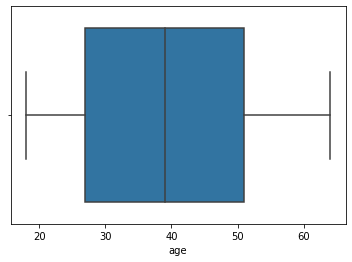

In [16]:
sns.boxplot(x=df['age'])

Observation : 

No any outliers founded in age

<Axes: xlabel='charges'>

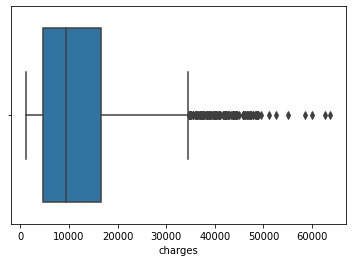

In [17]:
sns.boxplot(x=df['charges'])

Observation :
    
Outliers are detected from 35000 till end

#### Distribution of categorical columns

<Axes: >

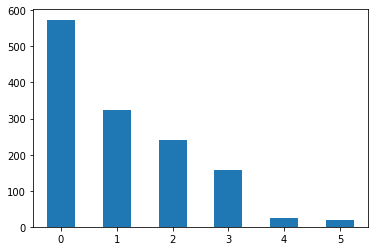

In [18]:
df['children'].value_counts().plot.bar(rot=0)

Observation :
    
There are more than 550 values where no of children=0

There are less than 50 values where no of children=5

<Axes: >

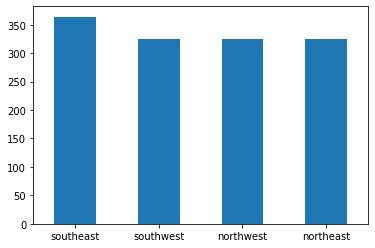

In [19]:
df['region'].value_counts().plot.bar(rot=0)

Observation :

There are more than 350 values where region=southeast

There are more than 300 values where region=southwest or northwest or northeast

<Axes: >

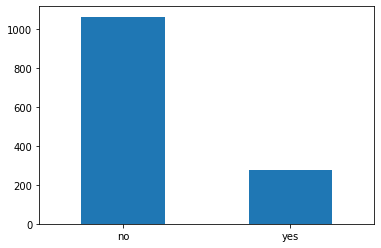

In [20]:
df['smoker'].value_counts().plot.bar(rot=0)

<Axes: >

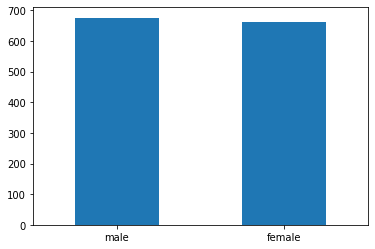

In [21]:
df['sex'].value_counts().plot.bar(rot=0)

#### Pair plot that includes all the columns of the data frame

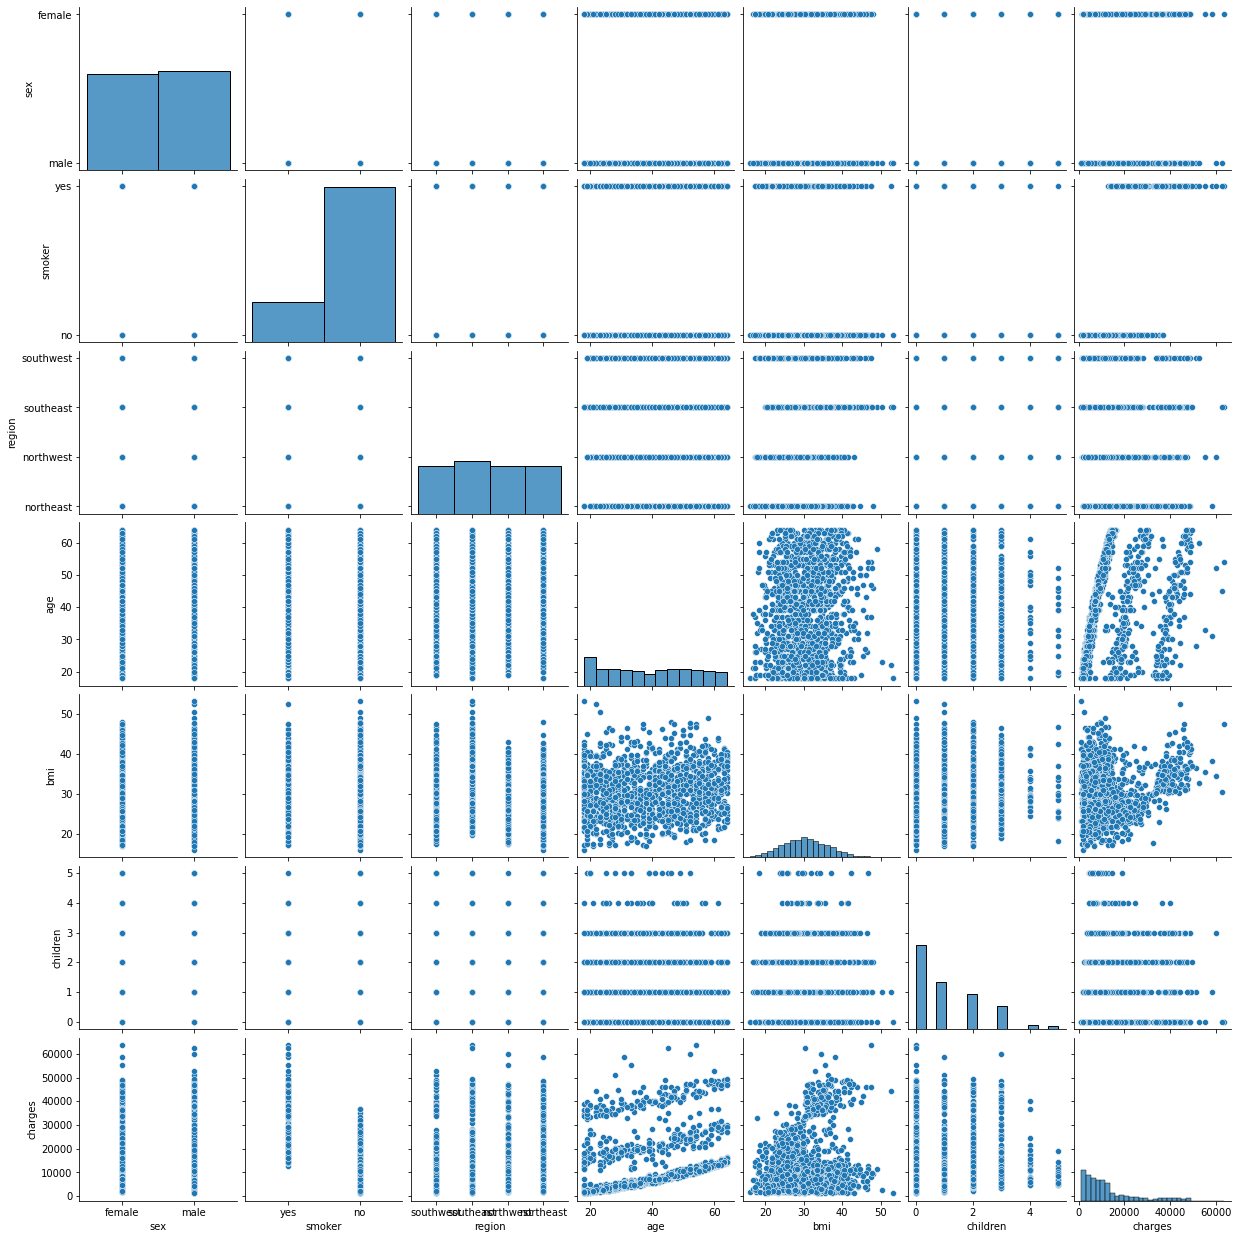

In [22]:
#pairplot is used to visualize each column of the dataset
sns.pairplot(df,vars=['sex', 'smoker','region','age','bmi','children','charges'])

## Statistical evidence

#### Do charges of people who smoke differ significantly from the people who don't?

In [23]:
df.smoker.value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

<Axes: xlabel='smoker', ylabel='charges'>

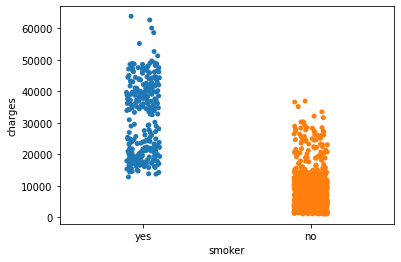

In [24]:
#this stripplot shows the charges are higher if person is smoker
sns.stripplot(data=df, x="smoker", y="charges")

#### Does bmi of males differ significantly from that of females? 

<Axes: xlabel='sex', ylabel='bmi'>

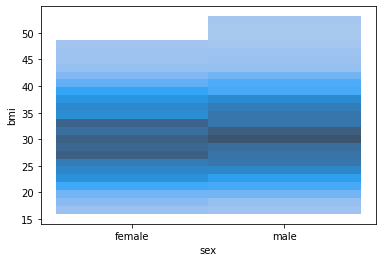

In [25]:
#this histogram shows bmi of males differ significantly from that of females
sns.histplot(data=df, x="sex", y="bmi")

#### Is the proportion of smokers significantly different in different genders? 

In [26]:
#count no of smoker and non smoker gender wise
df[['sex','smoker']].value_counts()


sex     smoker
female  no        547
male    no        517
        yes       159
female  yes       115
dtype: int64

In [27]:
crosstab = pd.crosstab(df['sex'], df['smoker'])
crosstab

smoker,no,yes
sex,,
female,547,115
male,517,159


<Axes: xlabel='smoker', ylabel='sex'>

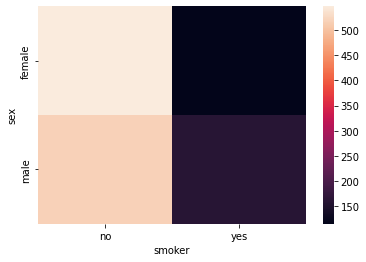

In [30]:
#this heatmap shows proportion of smokers significantly different in different genders? 
sns.heatmap(crosstab)

#### Is the distribution of bmi across women with no children, one child and two children, the same?

In [32]:
#fetch only those values where gender = female
data=df[df['sex']=='female']

<Axes: xlabel='children', ylabel='bmi'>

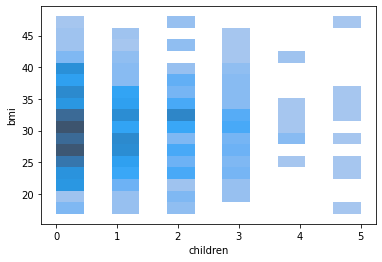

In [33]:
# this histplot shows bmi value according to number of children 
sns.histplot(data=data,x="children",y="bmi")